상관분석 & 히트맵
  - 생존자와 관련된 변수의 상관관계 찾아보기
  - 생존과 가장 상관도가 높은 변수는
  - 피어슨 상관계수를이용한 상관분석
  - 시각화 : 히드맵이나 산점도
  - 0.0 ~ 0.2: 상관관계가 거의 없음
  - 0.2 ~ 0.4 : 약한 상관관계
  - 0.4 ~ 0.6 : 상관관계가 있음
  - 0.6 ~ 0.8 : 강한 상관관계
  - 0.8 ~ 1.0 : 매우강한 상관관계



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 실행히 발생되는 경고문구를 출력하지 않는다
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


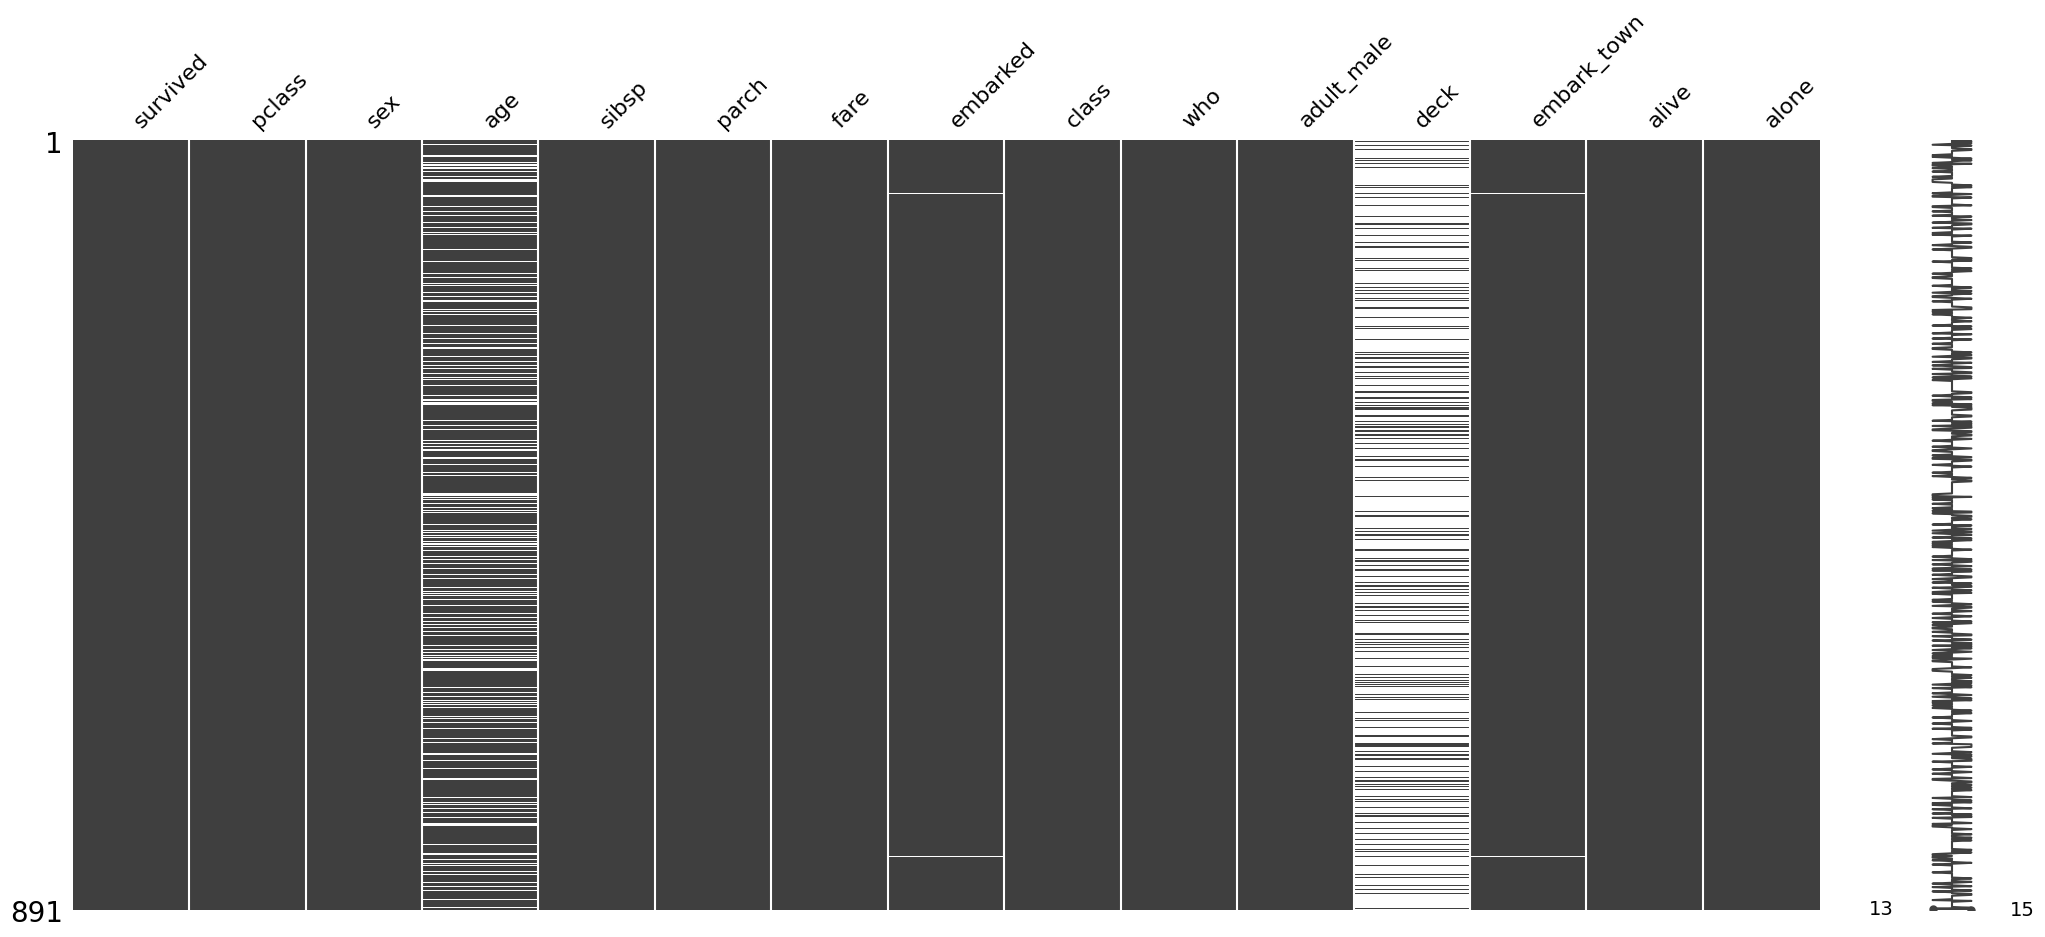

In [5]:
# 결측치 시각화
import missingno as msno
msno.matrix(titanic)
plt.show()

In [6]:
# 결측치 채움
# 수치형 데이터는 평균으로 채운다.
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

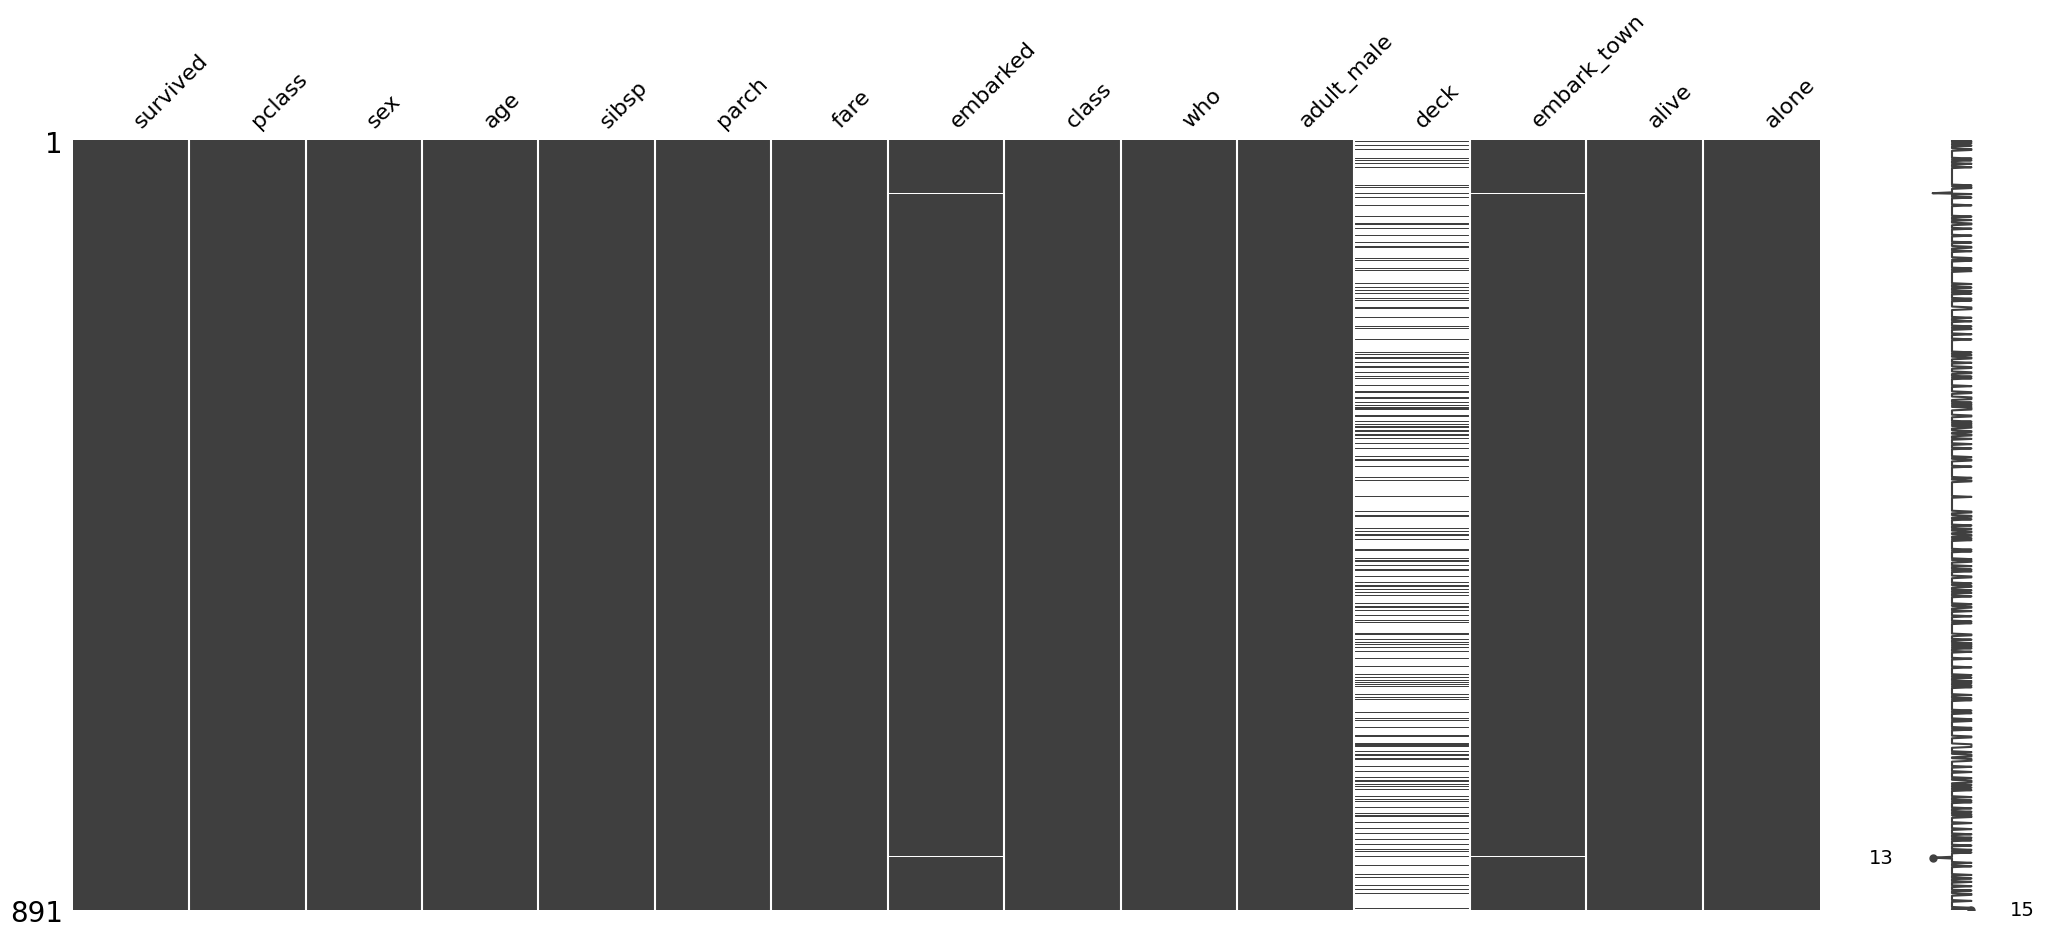

In [7]:
msno.matrix(titanic)
plt.show()

In [11]:
titanic['embarked'] = titanic['embarked'].str.lower()

In [12]:
titanic['embarked'].value_counts()

,count
embarked,
s,644
c,168
q,77


In [13]:
# 범주형 데이터는 빈도수가 가장 많은 데이터로 결측치를 채운다
titanic['embarked'].fillna('s', inplace=True)

In [20]:
titanic['embark_town'].fillna('Southampton',inplace=True)

In [31]:
most_preque = titanic['deck'].value_counts().index[0]

titanic['deck'].fillna(most_preque,inplace=True)

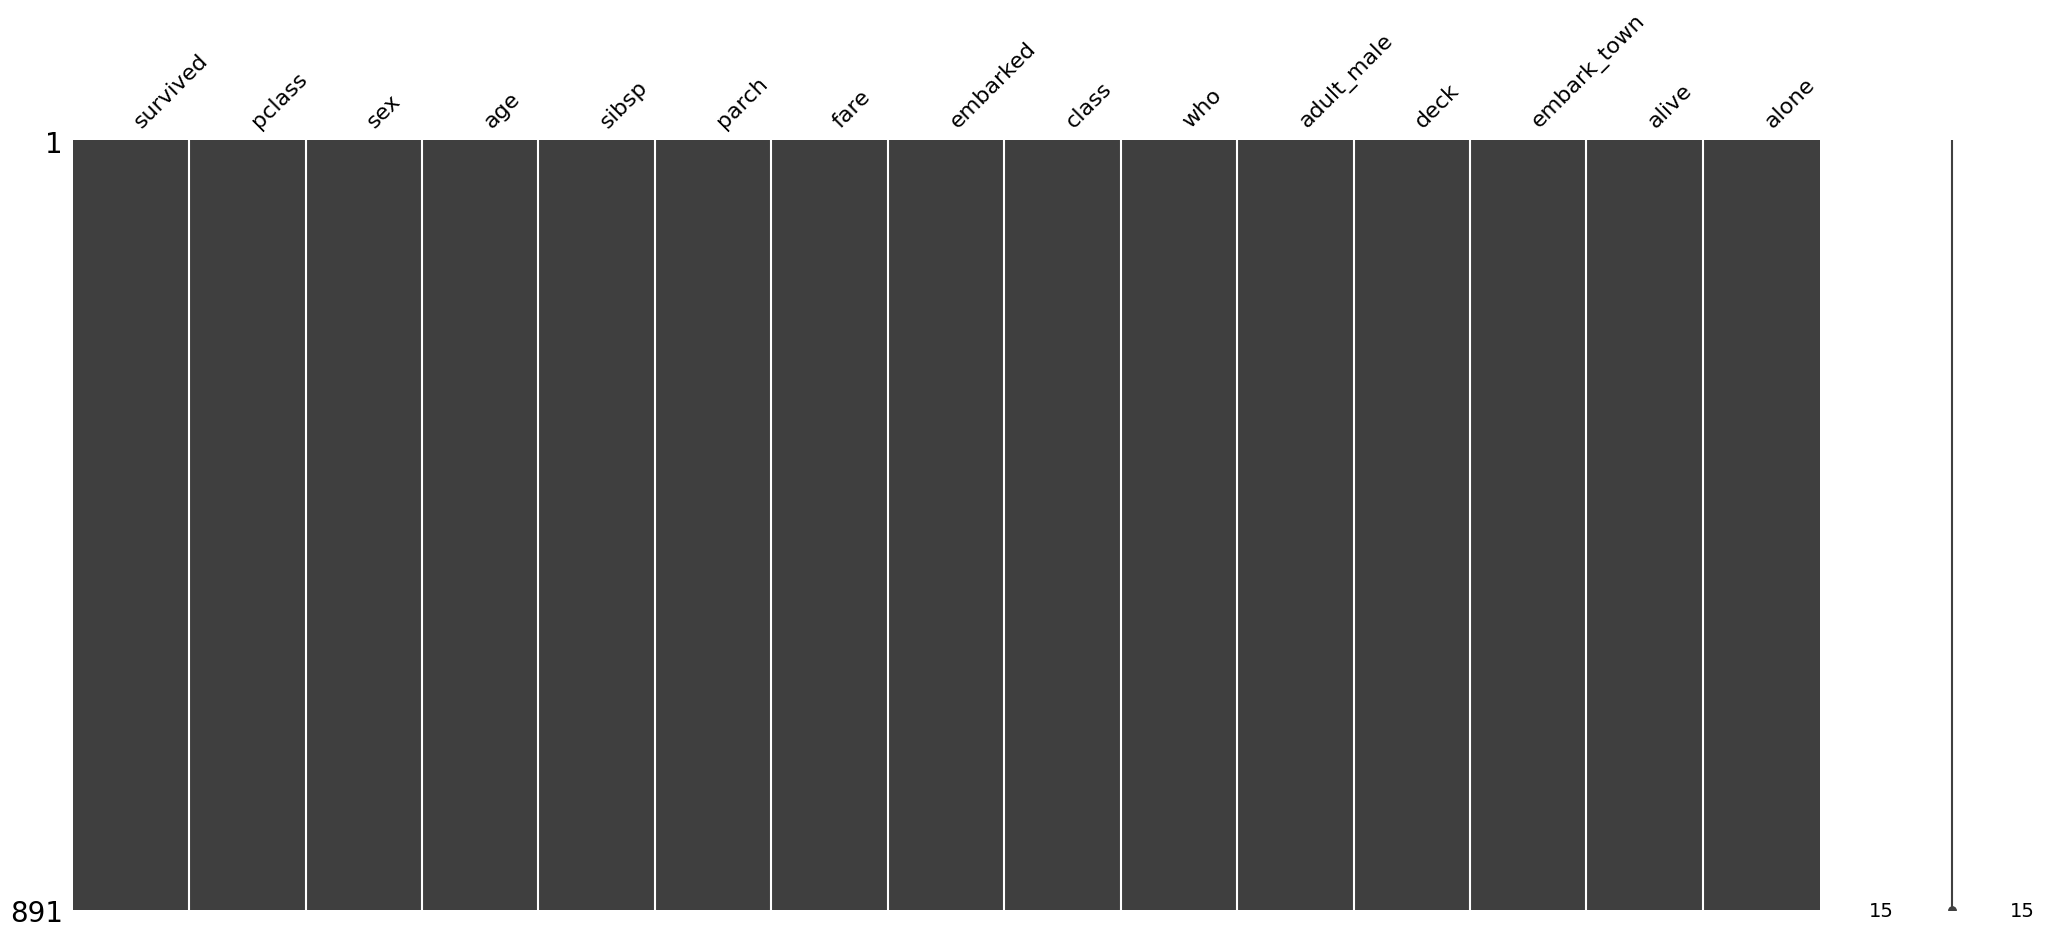

In [32]:
msno.matrix(titanic)
plt.show()

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,s,Third,man,True,C,Southampton,no,False


# 시각적 탐색
  - 생존율
    - 남자승객의 생존율
    - 여자승객의 생존율

In [45]:
male_survived =  titanic[titanic['sex'] == 'male']['survived'].value_counts()

In [57]:
female_survived =  titanic.groupby('sex')['survived'].value_counts()['female']

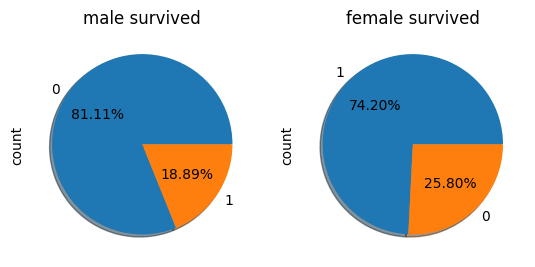

In [62]:
colors = ['blue','orange']

plt.subplot(1,2,1)
male_survived.plot.pie(autopct='%1.2f%%', shadow = True )
plt.title('male survived')

plt.subplot(1,2,2)
female_survived.plot.pie(autopct='%1.2f%%', shadow = True)
plt.title('female survived')
plt.show()